   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

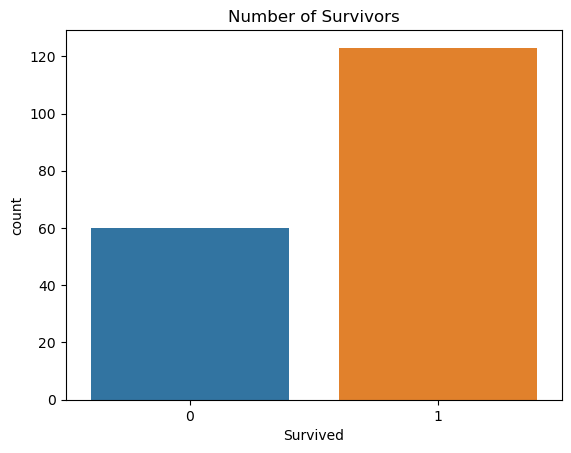

AttributeError: 'numpy.int64' object has no attribute 'startswith'

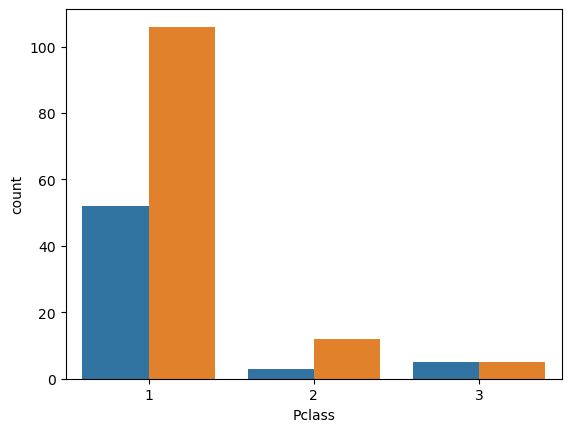

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 로드
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

# 데이터의 첫 5행 출력
print(df.head())

# 데이터 정보 출력
print(df.info())

# 결측값 확인
print(df.isnull().sum())

# 결측값이 있는 행 제거
df_cleaned = df.dropna()

# 필요한 열 선택
df_cleaned = df_cleaned[['Survived', 'Pclass', 'Sex', 'Age', 'Fare']]

# 데이터 정보 출력
print(df_cleaned.info())

# 생존자 수 시각화
sns.countplot(x='Survived', data=df_cleaned)
plt.title('Number of Survivors')
plt.show()

# 클래스별 생존자 수 시각화
sns.countplot(x='Pclass', hue='Survived', data=df_cleaned)
plt.title('Survivors by Class')
plt.show()

# 나이와 요금의 분포 시각화
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.histplot(df_cleaned['Age'], bins=20, kde=True)
plt.title('Age Distribution')

plt.subplot(1, 2, 2)
sns.histplot(df_cleaned['Fare'], bins=20, kde=True)
plt.title('Fare Distribution')

plt.tight_layout()
plt.show()

# 상관계수 계산
correlation = df_cleaned[['Age', 'Fare']].corr()
print(correlation)

# 나이와 요금의 관계를 분석하기 위해 회귀선을 그립니다.
sns.regplot(x='Age', y='Fare', data=df_cleaned)
plt.title('Age vs Fare')
plt.show()
